In [ ]:
!pip install imblearn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/Thesis/Sentiment Analysis/Data/Romanized Data.xlsx')
#data = data.astype({"Class": int})
data

,Romanized Review,Class
0,20 takar ta nen.,2
1,dekhailo ekta dilo arekta....purai faltu daraz...,0
2,onek balo koalitie er. ami 5 pcs oder disi. ab...,1
3,Chara 😠😠😠,2
4,tk usol er moto jinish khub bhaloi love it,1
...,...,...
1155,Duita Red colour order diyesilam,2
1156,large size koto r medium size koto?,2
1157,jeta order korsi sheta pabotho?,2
1158,faltu jinish daraz a shob.,0


In [ ]:
"""catagori_map={0:0,1:1,5:2, 9:3, 8:4}
data['Class']=data['Class'].map(catagori_map)
data.to_excel("/content/drive/MyDrive/Thesis/Sentiment Analysis/Data/Romanized Data.xlsx",index = False)"""

'catagori_map={0:0,1:1,5:2, 9:3, 8:4}\ndata[\'Class\']=data[\'Class\'].map(catagori_map)\ndata.to_excel("/content/drive/MyDrive/Thesis/Sentiment Analysis/Data/Romanized Data.xlsx",index = False)'

# **Visualization**

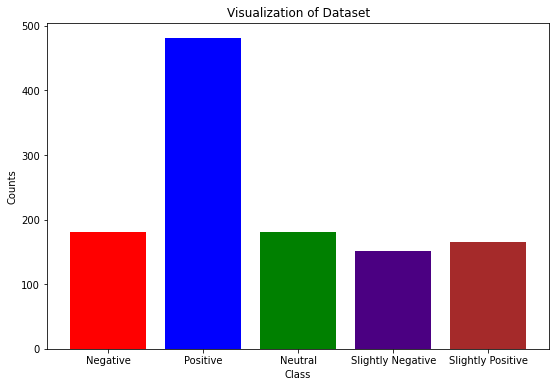

1    481
2    181
0    181
4    166
3    151
Name: Class, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
x = x = ['Negative', 'Positive', 'Neutral', 'Slightly Negative', 'Slightly Positive']
#x,y = np.unique(data['Class'], return_counts=True)
y = [len(data[data['Class']== 0]), len(data[data['Class']== 1]), len(data[data['Class']== 2]),len(data[data['Class']== 3]),
     len(data[data['Class']== 4])]
plt.xlabel("Class")
plt.ylabel("Counts")
plt.title("Visualization of Dataset")
plt.bar(x, y, color=['red', 'blue', 'green','indigo', 'brown'])
plt.show()
data["Class"].value_counts()

# **Preprocessing**

In [ ]:
import re
def remove_punc(text):
  txt = re.sub('[^a-zA-Z]',' ',text)
  txt = " ".join(txt.split())  

  return txt

def toLower(text):
  txt = text.lower()

  return txt

def preprocessing(text):
  text = toLower(text)
  text = remove_punc(text)
  text = " ".join(text.split()) 
  #text = remove_stopword(text)
  #text = stemming(text)

  return text

data['Reviews'] = data['Romanized Review'].apply(preprocessing)
data

,Romanized Review,Class,Reviews
0,20 takar ta nen.,2,takar ta nen
1,dekhailo ekta dilo arekta....purai faltu daraz...,0,dekhailo ekta dilo arekta purai faltu daraz aj...
2,onek balo koalitie er. ami 5 pcs oder disi. ab...,1,onek balo koalitie er ami pcs oder disi aber p...
3,Chara 😠😠😠,2,chara
4,tk usol er moto jinish khub bhaloi love it,1,tk usol er moto jinish khub bhaloi love it
...,...,...,...
1155,Duita Red colour order diyesilam,2,duita red colour order diyesilam
1156,large size koto r medium size koto?,2,large size koto r medium size koto
1157,jeta order korsi sheta pabotho?,2,jeta order korsi sheta pabotho
1158,faltu jinish daraz a shob.,0,faltu jinish daraz a shob


In [ ]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()
freq

valo       362
ta         200
product    186
na         175
but        103
          ... 
key          1
bolen        1
nity         1
hae          1
tora         1
Length: 1769, dtype: int64

# **Over Sampling**

In [ ]:
#Remove unncessary columns
dataf = data.drop('Romanized Review', axis = 1)
dataf

,Class,Reviews
0,2,takar ta nen
1,0,dekhailo ekta dilo arekta purai faltu daraz aj...
2,1,onek balo koalitie er ami pcs oder disi aber p...
3,2,chara
4,1,tk usol er moto jinish khub bhaloi love it
...,...,...
1155,2,duita red colour order diyesilam
1156,2,large size koto r medium size koto
1157,2,jeta order korsi sheta pabotho
1158,0,faltu jinish daraz a shob


In [ ]:
from imblearn import over_sampling
from collections import Counter

X = dataf.drop('Class', axis=1)
Y = dataf['Class']

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X,Y)
print(sorted(Counter(y_resampled).items()), y_resampled.shape) 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


[(0, 481), (1, 481), (2, 481), (3, 481), (4, 481)] (2405,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_resampled.shape
resampled_data = pd.DataFrame(X_resampled, columns=['Reviews'])
resampled_data['Class'] = y_resampled
resampled_data

,Reviews,Class
0,takar ta nen,2
1,dekhailo ekta dilo arekta purai faltu daraz aj...,0
2,onek balo koalitie er ami pcs oder disi aber p...,1
3,chara,2
4,tk usol er moto jinish khub bhaloi love it,1
...,...,...
2400,kharap na cole,4
2401,ja bujhloam motamuti valo,4
2402,order korselam sumsung er ram dise spny compan...,4
2403,type korte gele distortion sound ashe tobe val...,4


# **Visualization**

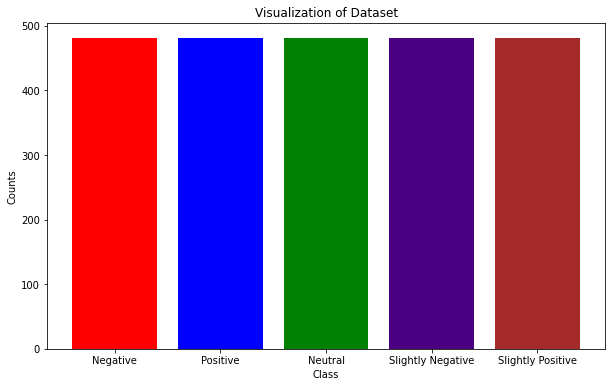

In [ ]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
x = ['Negative', 'Positive', 'Neutral', 'Slightly Negative', 'Slightly Positive']
#x,y = np.unique(data['Class'], return_counts=True)
y = [len(resampled_data[resampled_data['Class']== 0]), len(resampled_data[resampled_data['Class']== 1]), 
     len(resampled_data[resampled_data['Class']== 2]),len(resampled_data[resampled_data['Class']== 3]),
     len(resampled_data[resampled_data['Class']== 4])]
plt.xlabel("Class")
plt.ylabel("Counts")
plt.title("Visualization of Dataset")
plt.bar(x, y, color=['red', 'blue', 'green','indigo', 'brown'])
plt.show()

# **Feature Extraction**

In [ ]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

tfidf_vect = tfidf.fit_transform(resampled_data['Reviews'])

dftf = pd.DataFrame(tfidf_vect.toarray(), columns=tfidf.get_feature_names())
dftf
#tfidf.get_feature_names()

,aa,abar,aber,aboron,aca,ace,ache,acon,actually,adi,against,agar,age,agee,ager,ageu,agula,agulo,ai,aii,aikan,air,airbud,aircoller,airpod,aita,aj,ajk,ajka,ajke,ajkei,ak,akdm,akdom,akdome,ake,akebare,akhan,akhun,akon,...,vhaiya,vhalo,video,vile,vitor,vlao,vlo,vloi,vlona,vloy,voice,vokta,voye,vry,vul,vule,vull,wall,want,warking,warning,warranty,was,wash,we,welstick,what,wonderful,words,working,works,worst,wow,xoss,xxl,yeah,year,you,zak,zinish
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.326878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.210455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.29607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2401,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2402,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2403,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#BagofWOrds
from sklearn.feature_extraction.text import CountVectorizer
cVect = CountVectorizer()
count_vect = cVect.fit_transform(resampled_data['Reviews'])

dfcv = pd.DataFrame(count_vect.toarray(), columns=cVect.get_feature_names())
dfcv

#cVect.get_feature_names()

,aa,abar,aber,aboron,aca,ace,ache,acon,actually,adi,against,agar,age,agee,ager,ageu,agula,agulo,ai,aii,aikan,air,airbud,aircoller,airpod,aita,aj,ajk,ajka,ajke,ajkei,ak,akdm,akdom,akdome,ake,akebare,akhan,akhun,akon,...,vhaiya,vhalo,video,vile,vitor,vlao,vlo,vloi,vlona,vloy,voice,vokta,voye,vry,vul,vule,vull,wall,want,warking,warning,warranty,was,wash,we,welstick,what,wonderful,words,working,works,worst,wow,xoss,xxl,yeah,year,you,zak,zinish
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2402,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2403,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Train test split**

In [ ]:
label = resampled_data['Class']


In [ ]:
from sklearn.model_selection import train_test_split
label = resampled_data['Class']
x_train, x_test, y_train, y_test = train_test_split(tfidf_vect, label, test_size = 0.2, random_state = 4, stratify = label)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
skfold=StratifiedKFold(n_splits=10)

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

kfold_validation=KFold(n_splits=10, shuffle=True)

# **MNB Algorithm**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
mnb_model = MultinomialNB()
mnb_model = mnb_model.fit(x_train,y_train)
y_pred_mnb = mnb_model.predict(x_test)
print(classification_report(y_test,y_pred_mnb))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        96
           1       0.96      0.78      0.86        96
           2       0.95      0.89      0.91        97
           3       0.78      0.83      0.81        96
           4       0.82      0.97      0.89        96

    accuracy                           0.87       481
   macro avg       0.88      0.87      0.87       481
weighted avg       0.88      0.87      0.87       481



Confusion Matrix

Confusion matrix, without normalization for Multinomial NB
[[85  1  1  3  6]
 [ 0 75  4 12  5]
 [ 5  2 86  4  0]
 [ 6  0  0 80 10]
 [ 0  0  0  3 93]]


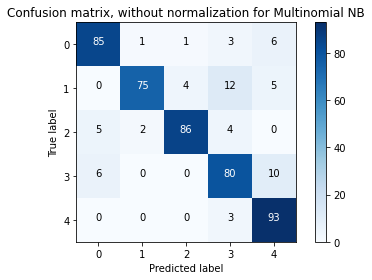

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for Multinomial NB")
    else:
        print('Confusion matrix, without normalization for Multinomial NB')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_mnb)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for Multinomial NB')

plt.savefig('/content/drive/MyDrive/Thesis/Sentiment Analysis/MNB COnfusion.png')

ROC_AUC

Roc_AUC Score:  0.9814006792310996 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


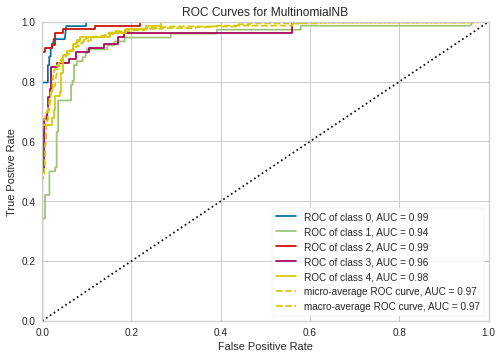

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt
y_pred_mnd_prob = mnb_model.predict_proba(x_test)
mnb = roc_auc_score(y_test, y_pred_mnd_prob, multi_class="ovo")
print("Roc_AUC Score: ", mnb, "\n")

# Instantiate the visualizer with the classification model
roc_auc(mnb_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

Using cross validation

In [ ]:
results=cross_val_score(mnb_model,tfidf_vect,label,cv=kfold_validation, scoring = 'accuracy')
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.88 0.89 0.87 0.88 0.85 0.9  0.88 0.89 0.88 0.91] 

Accuracy: 0.88 (0.02)


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
lgc_model = LogisticRegression(multi_class="multinomial")
lgc_model = lgc_model.fit(x_train,y_train)
y_pred_lgc = lgc_model.predict(x_test)
print(classification_report(y_test,y_pred_lgc))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        96
           1       0.94      0.89      0.91        96
           2       0.94      0.95      0.94        97
           3       0.90      0.85      0.88        96
           4       0.88      0.92      0.90        96

    accuracy                           0.91       481
   macro avg       0.91      0.91      0.91       481
weighted avg       0.91      0.91      0.91       481



Confusion Matrix

Confusion matrix, without normalization for Logistic Regression
[[90  1  1  0  4]
 [ 1 85  4  5  1]
 [ 3  1 92  1  0]
 [ 6  0  1 82  7]
 [ 2  3  0  3 88]]


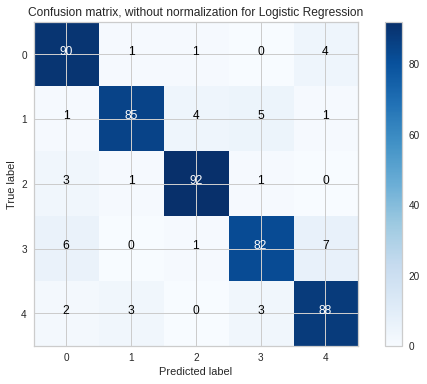

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for Logistic Regression")
    else:
        print('Confusion matrix, without normalization for Logistic Regression')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_lgc)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for Logistic Regression')

plt.savefig('/content/drive/MyDrive/Thesis/Sentiment Analysis/LGC COnfusion.png')

ROC_AUC

Roc_AUC Score:  0.9876068290020046 



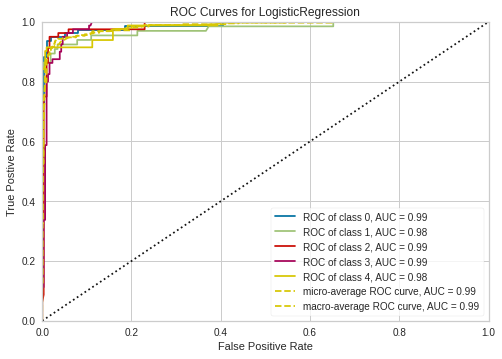

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt

y_pred_lgc_prob = lgc_model.predict_proba(x_test)
lgc = roc_auc_score(y_test, y_pred_lgc_prob, multi_class="ovo")
print("Roc_AUC Score: ", lgc, "\n")

# Instantiate the visualizer with the classification model
roc_auc(lgc_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

Cross Validation

In [ ]:
results=cross_val_score(lgc_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.93 0.93 0.92 0.94 0.91 0.92 0.94 0.93 0.94 0.88] 

Accuracy: 0.92 (0.02)


# **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svmModel = SVC(kernel = 'rbf', probability=True)
svmModel.fit(x_train,y_train)
y_predSVM = svmModel.predict(x_test)
#print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        96
           1       0.89      0.92      0.90        96
           2       0.96      0.92      0.94        97
           3       0.95      0.94      0.94        96
           4       0.94      0.98      0.96        96

    accuracy                           0.93       481
   macro avg       0.93      0.93      0.93       481
weighted avg       0.93      0.93      0.93       481



Confusion Matrix

Confusion matrix, without normalization for SVM
[[88  4  1  1  2]
 [ 1 88  3  3  1]
 [ 3  4 89  1  0]
 [ 0  3  0 90  3]
 [ 2  0  0  0 94]]


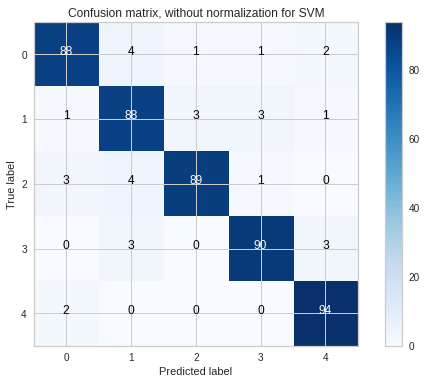

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for SVM")
    else:
        print('Confusion matrix, without normalization for SVM')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_predSVM)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for SVM')

ROC_AUC

Roc_AUC Score:  0.9891303448059852 



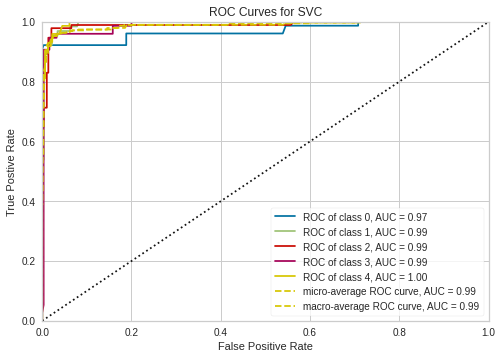

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc

import matplotlib.pyplot as plt
y_pred_svm_prob = svmModel.predict_proba(x_test)
svm = roc_auc_score(y_test, y_pred_svm_prob, multi_class="ovo")
print("Roc_AUC Score: ", svm, "\n")

# Instantiate the visualizer with the classification model
roc_auc(svmModel, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

Cross Validation

In [ ]:
results=cross_val_score(svmModel,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.94 0.95 0.92 0.95 0.95 0.94 0.94 0.97 0.96 0.95] 

Accuracy: 0.95 (0.01)


# **Passive Algorithm**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
passive_model = PassiveAggressiveClassifier(random_state = 4)

passive_model.fit(x_train, y_train)
y_pred_passive = passive_model.predict(x_test)
print(classification_report(y_test,pred))


NameError: ignored

Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for SVM")
    else:
        print('Confusion matrix, without normalization for Passive Algorithm')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_passive)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for Passive Algorithm')

ROC_AUC

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc

import matplotlib.pyplot as plt
y_pred_passive_prob = passive_model.predict_proba(x_test)
passive = roc_auc_score(y_test, y_pred_passive_prob, multi_class="ovo")
print("Roc_AUC Score: ", passive, "\n")

# Instantiate the visualizer with the classification model
roc_auc(svmModel, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '5', '8', '9'])

Cross Validation

In [ ]:
results=cross_val_score(passive_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 2)
rf_model = rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        96
           1       0.93      0.93      0.93        96
           2       0.97      0.92      0.94        97
           3       0.95      0.96      0.95        96
           4       0.93      0.97      0.95        96

    accuracy                           0.94       481
   macro avg       0.94      0.94      0.94       481
weighted avg       0.94      0.94      0.94       481



Confusion Matrix

Confusion matrix, without normalization for Random Forest
[[90  1  1  1  3]
 [ 1 89  2  3  1]
 [ 3  4 89  1  0]
 [ 0  1  0 92  3]
 [ 2  1  0  0 93]]


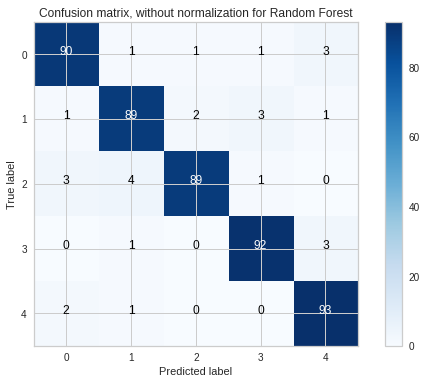

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for Random Forest")
    else:
        print('Confusion matrix, without normalization for Random Forest')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_rf)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for Random Forest')

ROC_AUC

Roc_AUC Score:  0.9943159420192582 



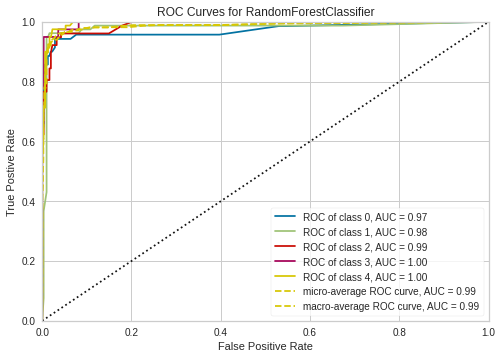

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt
y_pred_rf_prob = rf_model.predict_proba(x_test)
rf = roc_auc_score(y_test, y_pred_rf_prob, multi_class="ovo")
print("Roc_AUC Score: ", rf, "\n")

# Instantiate the visualizer with the classification model
roc_auc(rf_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

Cross Validaion

In [ ]:
results=cross_val_score(rf_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.94 0.97 0.94 0.94 0.96 0.96 0.92 0.97 0.94 0.97] 

Accuracy: 0.95 (0.02)


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93        96
           1       0.85      0.92      0.88        96
           2       0.96      0.93      0.94        97
           3       0.95      0.94      0.94        96
           4       0.92      0.98      0.95        96

    accuracy                           0.93       481
   macro avg       0.93      0.93      0.93       481
weighted avg       0.93      0.93      0.93       481



Confusion Matrix

Confusion matrix, without normalization for KNN
[[85  5  1  1  4]
 [ 0 88  3  2  3]
 [ 0  6 90  1  0]
 [ 0  5  0 90  1]
 [ 1  0  0  1 94]]


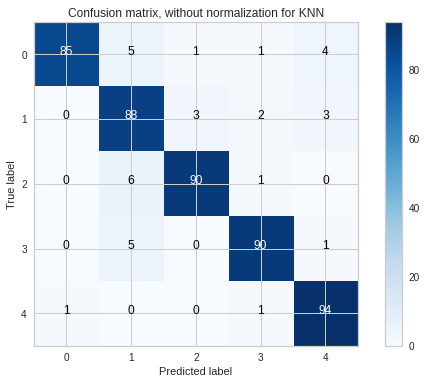

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for KNN")
    else:
        print('Confusion matrix, without normalization for KNN')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_knn)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for KNN')

ROC_AUC

Roc_AUC Score:  0.9558231314432991 



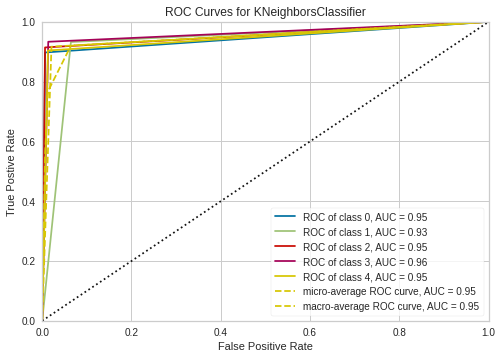

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt

y_pred_knn_prob = knn_model.predict_proba(x_test)
knn = roc_auc_score(y_test, y_pred_knn_prob, multi_class="ovo")
print("Roc_AUC Score: ", knn, "\n")

# Instantiate the visualizer with the classification model
roc_auc(knn_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

In [ ]:
results=cross_val_score(knn_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

[0.95 0.94 0.92 0.96 0.95 0.95 0.92 0.92 0.95 0.94] 

Accuracy: 0.94 (0.01)


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dst_model = DecisionTreeClassifier()
dst_model.fit(x_train, y_train)
y_pred_dst = dst_model.predict(x_test)
print(classification_report(y_test,y_pred_dst))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        96
           1       0.97      0.89      0.92        96
           2       0.97      0.95      0.96        97
           3       0.91      0.96      0.93        96
           4       0.94      0.96      0.95        96

    accuracy                           0.94       481
   macro avg       0.94      0.94      0.94       481
weighted avg       0.94      0.94      0.94       481



Confusion Matrix

Confusion matrix, without normalization for Decision Tree
[[91  1  0  1  3]
 [ 1 85  2  6  2]
 [ 3  1 92  1  0]
 [ 2  0  1 92  1]
 [ 2  1  0  1 92]]


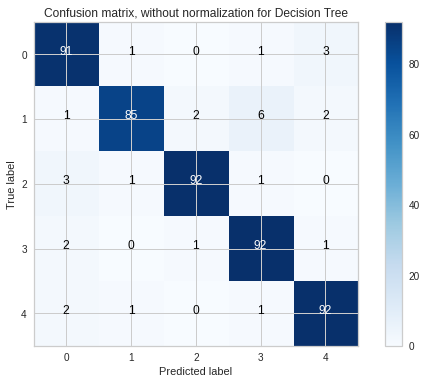

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix for Decision Tree")
    else:
        print('Confusion matrix, without normalization for Decision Tree')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cnf_matrix = confusion_matrix(y_test, y_pred_dst)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4'],
                      title='Confusion matrix, without normalization for Decision Tree')

ROC_AUC

Roc_AUC Score:  0.9718978200171822 



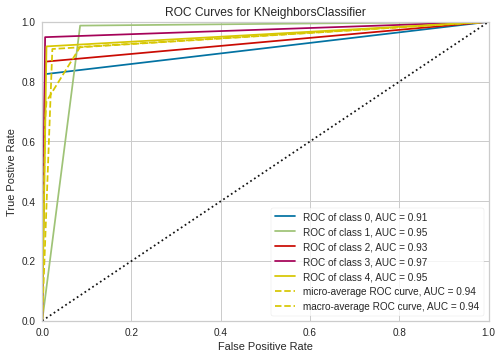

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from yellowbrick.classifier.rocauc import roc_auc
import matplotlib.pyplot as plt

y_pred_dst_prob = dst_model.predict_proba(x_test)
dst = roc_auc_score(y_test, y_pred_dst_prob, multi_class="ovo")
print("Roc_AUC Score: ", dst, "\n")

# Instantiate the visualizer with the classification model
roc_auc(knn_model, x_train, y_train, X_test=x_test, y_test=y_test, classes=['0', '1', '2', '3', '4'])

In [ ]:
results=cross_val_score(dst_model,tfidf_vect,label,cv=kfold_validation)
print(results, "\n")
print('Accuracy: %.2f (%.2f)' % (mean(results), std(results)))

# **Predictive Model**

In [ ]:
def preprocessing(text):
  text = toLower(text)
  text = remove_punc(text)
  #text = remove_stopword(text)
  #text = stemming(text)
  text = tfidf.transform([text])

  return text

text = "eto kom price e vhalo product pabo vhabi ni, tobe color match hoi nai"
print("Review: " ,text)
txt = preprocessing(text)
predict = rf_model.predict(txt)
if predict[0] == 1:
  print("Sentiment : Positive")
elif predict[0] == 0:
  print("Sentiment : Negative")
elif predict[0] == 4:
  print("Sentiment : Slightly Positive")
elif predict[0] == 3:
  print("Sentiment : Slightly Negative")
elif predict[0] == 2:
  print("Sentiment : Neutral")